Goal is to correct for black body curve of the telluric standard star

In [1]:
from math import *
import astropy.units as u
import numpy as np 
from astropy.io import fits,ascii
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
from specutils import Spectrum1D
mpl.rc('font',family='serif')

In [2]:
# define constants (all cgs)
h=6.626e-27 
k=1.381e-16 
c=2.99792e10

The following are different functions

In [3]:
### Load telluric spectrum from step 1 ###
def LoadFile(filename):
    data=ascii.read(filename) 
    return data['wavelength'],data['flux']

In [4]:
### Return blackbody curve calculated at input wv points ###

# T  = blackbody temperature
# wv = wavelength array to calculate BB over (microns)
# Rd = ratio of radius/distance(pc)
# sc = scaling factor (just for plotting purposes)

def BlackBodyCal(T,wv,Rd,sc):
    Flux=[]
    for i in wv:
        nu=c/i*1e4 # converting wavelength to frequency
        tt=2*h*nu**3/c**2/(exp(h*nu/k/T)-1)*pi*(Rd)**2*1e29*sc
        Flux.append(tt) #flux unit: micro-jansky
    return np.asarray(Flux)

In [5]:
### Plot to look at the BB curve and telluric spectrum together ###

# wv   = wavelength array of telluric spectrum
# flux = flux array of telluric spectrum
# name = telluric star
# saveflag = 'Y' saves plot to a png

def Plot1(wv,flux,name,saveflag):
    plt.figure(1,figsize=(10,5))
    plt.gcf().subplots_adjust(top=0.95,bottom=0.15,right=0.97,left=0.1)
    plt.plot(wv,flux,'k',label=name)
    plt.plot(wvBB,FluxBB,'r',label='BB')
    plt.tick_params(axis='both',which='major',labelsize=15,direction='in',right=True,top=True)
    plt.ylabel('Flux (cts)',fontsize=20)
    plt.xlabel(r'$\lambda$ (${\AA}$)',fontsize=20)
    plt.legend(fontsize=15)
    if saveflag=='Y':
        plt.savefig(name+'-BBCorr.png')
    plt.show()
    plt.close('all')

In [6]:
### Correct for blackbody curve in telluric spectrum ###

# wv   = telluric wavelength array
# flux = telluric flux array
# T    = telluric Teff
# Rd   = telluric radius/distance ratio
# sc   = scaling factor multiplied to blackbody curve (really doesn't matter here)
# plotflag = 'Y' plots corrected telluric spectrum

### Returns an array of BB-corrected telluric flux ###

def BBCorr(wv,flux,T,Rd,sc,plotflag):
    BB_Flux=BlackBodyCal(T,wv*1e-4,Rd,sc)
    corrFlux=[x/y for x,y in zip(flux,BB_Flux)]
    ttFlux=[x/y for x,y in zip(flux,corrFlux)]
    if plotflag=='Y':
        plt.figure()
        plt.plot(wv,corrFlux,'k')
        plt.show()
        plt.close('all')
    return corrFlux

In [7]:
#### Save the BB-corrected telluric star spectrum ###
def SaveOutput(wv,flux,outname):
    data_out={'wavelength': wv,'flux': flux}
    ascii.write(data_out,outname, overwrite = True)

Calling the functions

In [8]:
name = 'HIP1123'  # Telluric standard name
T = 9450          # Telluric star Teff

tellfile = 'telluric-step1.txt'

outfile = 'telluric-step2.txt'

In [9]:
# Load telluric spectrum from previous step:
wv,flux=LoadFile(tellfile)


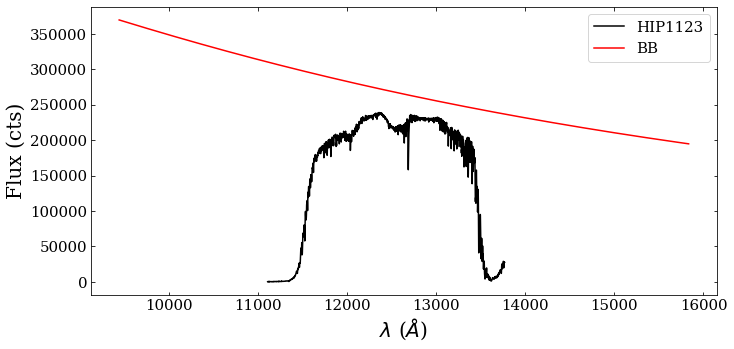

In [10]:
# Calculating blackbody model that will be removed from telluric spectrum:
wvBB=np.arange(wv[0]*0.85,wv[-1]*1.15,0.1)
FluxBB=BlackBodyCal(T,wvBB*1e-4,1e-12,1e4)

# Plotting blackbody curve with telluric spectra to show the trend that will be removed:
Plot1(wv,flux,name,False)

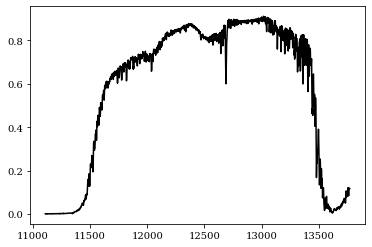

In [11]:
# Doing blackbody correction:
flux_corr=BBCorr(wv,flux,T,1e-12,1e4,'Y')

In [12]:
# Saving the BB-corrected telluric spectrum to .txt file:
SaveOutput(wv,flux_corr,outfile)